## CSCN8010 - Foundations of Machine Learning Frameworks - Winter 2024 - Sec 1
### Group Number: 14
### Group Members:  Yekini Yakub (#8939553),Asif Afzal(#8764552)
### Topic: Spam Email Classification

## Step 1: Data Understanding and Exploratory Data Analysis (EDA)

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
# Load the dataset
emails = pd.read_csv("emails.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'emails.csv'

### First few rows of the dataset

In [ ]:
# Display the first few rows of the dataset
print(emails.head())

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay   
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0  \
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


### Dimensions of the dataset

In [ ]:
# Check the dimensions of the dataset
print("Number of rows:", emails.shape[0])
print("Number of columns:", emails.shape[1])

Number of rows: 5172
Number of columns: 3002


### Distribution of Spam and Non-Spam emails

In [ ]:
# Check the distribution of spam and non-spam emails
spam_count = emails['spam'].value_counts()
print(spam_count)

spam
0    5104
1      57
2       5
4       3
5       2
3       1
Name: count, dtype: int64


### Visualization

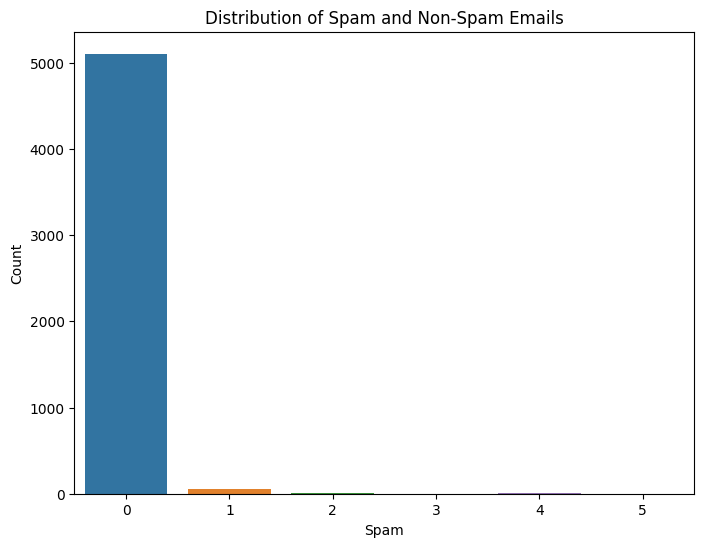

In [ ]:
# Visualize the distribution of spam and non-spam emails
plt.figure(figsize=(8, 6))
sns.countplot(x='spam', data=emails)
plt.xlabel('Spam')
plt.ylabel('Count')
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()

### Analyzing the features in the dataset

In [ ]:
# Analyze the features in the dataset
print(emails.columns)

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


### Exploring the Email Subject and Sender

In [ ]:
# Explore the email subject and sender
subject_count = emails['subject'].nunique()
sender_count = emails['sender'].nunique()
print("Number of unique subjects:", subject_count)
print("Number of unique senders:", sender_count)



Number of unique subjects: 15
Number of unique senders: 4


# Step 2: Data Preprocessing
### Cleaning the data whereby checking for missing values in each column,splitting the datasets into a train and test sets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you've already loaded the dataset into a DataFrame named 'emails'
# emails = pd.read_csv("/path/to/emails.csv")

# Check for missing values and print the count of missing values in each column
missing_values = emails.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Assuming there are missing values, you can decide to fill them with a placeholder value,
# drop them, or use other imputation methods depending on your analysis.
# Here's an example of dropping rows with any missing values:
emails.dropna(inplace=True)

# Assuming 'Prediction' is the target variable and all other columns are features
X = emails.drop('Prediction', axis=1)  # Features
y = emails['Prediction']                # Target variable

X = emails.iloc[:, 1:]  # Features, excluding the first column


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the resulting feature sets
print("Training feature set shape:", X_train.shape)
print("Test feature set shape:", X_test.shape)
print("Training label set shape:", y_train.shape)
print("Test label set shape:", y_test.shape)

Missing values in each column:
 Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


Training feature set shape: (4137, 3001)
Test feature set shape: (1035, 3001)
Training label set shape: (4137,)
Test label set shape: (1035,)


## Step 3: Model Selection

### Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Multinomial Naive Bayes 

In [ ]:
mnb = MultinomialNB(alpha=1.9)         # alpha by default is 1. alpha must always be > 0. 
# alpha is the '1' in the formula for Laplace Smoothing (P(words))
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)

### Accuracy Score of Naive Bayes

In [ ]:
print("Accuracy Score for Naive Bayes : ", accuracy_score(y_pred1,y_test))

Accuracy Score for Naive Bayes :  0.9652173913043478


### Support Vector Machines

In [ ]:
svc = SVC(C=1.0,kernel='rbf',gamma='auto')         
# C here is the regularization parameter. Here, L2 penalty is used(default). It is the inverse of the strength of regularization.
# As C increases, model overfits.
# Kernel here is the radial basis function kernel.
# gamma (only used for rbf kernel) : As gamma increases, model overfits.
svc.fit(X_train,y_train)
y_pred2 = svc.predict(X_test)

### Accuracy Score of Support Vector Machine

In [ ]:
print("Accuracy Score for SVC : ", accuracy_score(y_pred2,y_test))

Accuracy Score for SVC :  0.9227053140096618


### Random Forrest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
# n_estimators = No. of trees in the forest
# criterion = basis of making the decision tree split, either on gini impurity('gini'), or on infromation gain('entropy')
rfc.fit(X_train,y_train)
y_pred3 = rfc.predict(X_test)

### Accuracy Score of Random Forrest Classifier

In [ ]:
print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_pred3,y_test))

Accuracy Score of Random Forest Classifier :  0.9990338164251208


## Step 4: Hyperparameter Tuning

### Importing Libraries

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

### Hyperparameter tuning

In [ ]:
# Define the parameter grid to search
param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]}

# Initialize the GridSearchCV object with MultinomialNB estimator and the parameter grid
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]},
             scoring='accuracy')

### Best Parameters

In [ ]:
# Print out the best parameters and the best score
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.01}


### Best Cross-Validation Score

In [ ]:
print("Best cross-validation score (accuracy):", grid_search.best_score_)

Best cross-validation score (accuracy): 0.9664020468604875


### Test set accuracy

In [ ]:
# Use the best estimator to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model using the test data
print("Test set accuracy:", accuracy_score(y_test, y_pred))

Test set accuracy: 0.9710144927536232


## Step 5: Model Evaluation

### Importing Libraries

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test are the true labels and y_pred are the predictions from your best model
# For example:
# best_model = grid_search.best_estimator_ # From hyperparameter tuning
# y_pred = best_model.predict(X_test) # Predictions

### Calculating Metrices

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9710
Precision: 0.9080
Recall: 1.0000
F1 Score: 0.9518


### Confusion Matrix

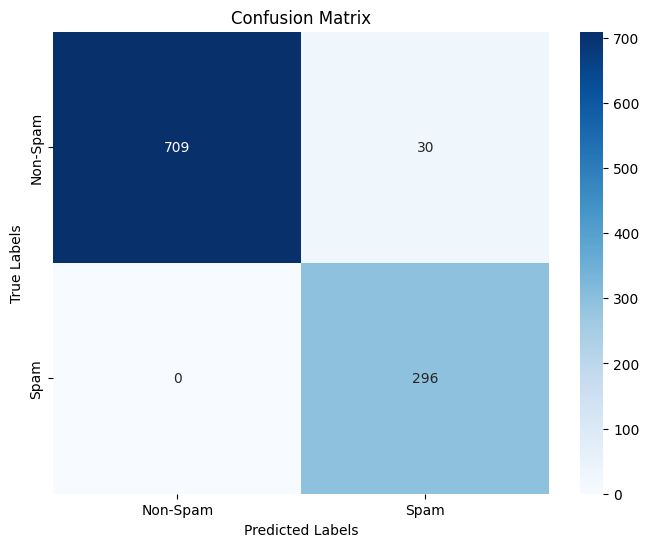

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### As expected, Random Forest Classifier performs the best among the three. Decision tree classifiers are excellent classifiers. Random forest is a popular ensemble model that uses a forest of decision trees. So, obviously, combibining the accuracy of 100 trees (as n_estimators=100 here), will create a powerful model.

# Step 6: Conclusion 
### In conclusion, we obtained our (email.csv) datasets from kaggle,analyzing and visualizing the datasets,training a model using multinomial naive bayes,support vector machine and random forest classifier getting the accuracy for each differently,we tuned the parameters with cross-validation score. Calculating metrices which we obtained the accuracy,precision,recall and F1-Score also visualizing the labels against the predicted labels of getting spam and non-spam




